# Part 1: Blob Detection

DoG pyramid construction in OpenCV's swift


In [30]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

SIFT Tunable Parameters:
nfeatures: Number of best features to retain. Default is 0 (all features are retained). Range: [0, inf)
nOctaveLayers: Number of layers in each octave. Default is 3. Range: [1, 5]
contrastThreshold: Contrast threshold used to filter out weak features. Default is 0.04. Range: [0.01, 0.09]
edgeThreshold: Threshold used to filter out edge-like features. Default is 10. Range: [2, 10]
sigma: Sigma of the Gaussian applied to the input image at the octave #0. Default is 1.6. Range: [1.0, 2.0]
Number of keypoints detected in image 1: 384
Number of keypoints detected in image 2: 7903
Number of keypoints detected in image 3: 1061
Number of keypoints detected in image 4: 5295


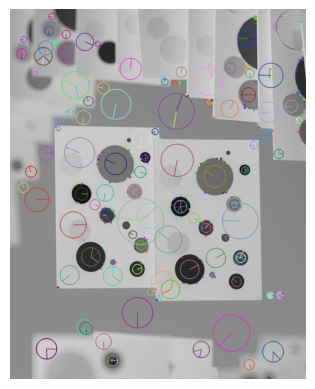

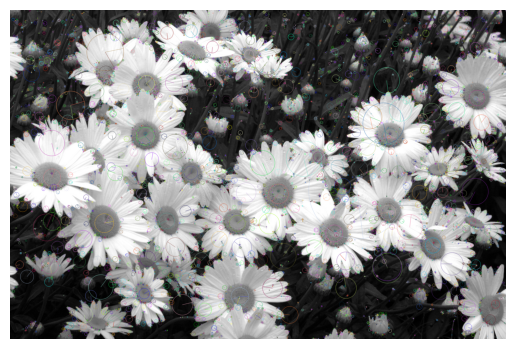

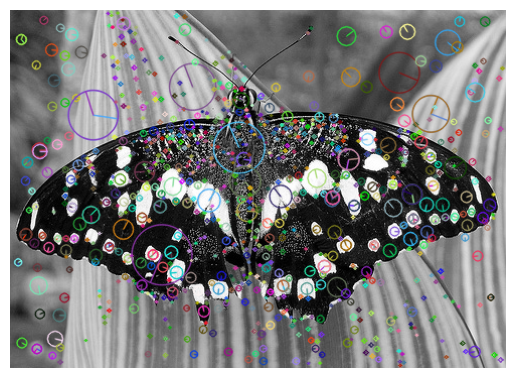

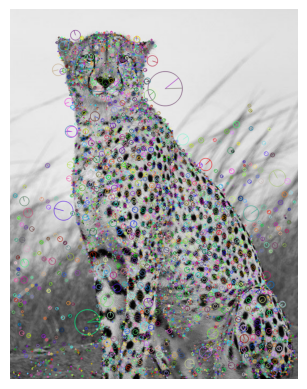

In [64]:
#get the image from file
image1 = cv2.imread('./images/example-image.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('./images/image2.jpg', cv2.IMREAD_GRAYSCALE)
image3 = cv2.imread('./images/image3.jpg', cv2.IMREAD_GRAYSCALE)
image4 = cv2.imread('./images/image4.png', cv2.IMREAD_GRAYSCALE)


#initailize the SIFT detector using cv2
sift = cv2.SIFT_create()

#print the tunable parameters of SIFT, description, default values, and appropriate range
#https://docs.opencv.org/3.4/d7/d60/classcv_1_1SIFT.html
print("SIFT Tunable Parameters:")
print("nfeatures: Number of best features to retain. Default is 0 (all features are retained). Range: [0, inf)")
print("nOctaveLayers: Number of layers in each octave. Default is 3. Range: [1, 5]")
print("contrastThreshold: Contrast threshold used to filter out weak features. Default is 0.04. Range: [0.01, 0.09]")
print("edgeThreshold: Threshold used to filter out edge-like features. Default is 10. Range: [2, 10]")
print("sigma: Sigma of the Gaussian applied to the input image at the octave #0. Default is 1.6. Range: [1.0, 2.0]")

#use the dector to find keypoints on the input images 
sift = cv2.SIFT_create()
keypoints1 = sift.detect(image1, None)
keypoints2 = sift.detect(image2, None)
keypoints3 = sift.detect(image3, None)
keypoints4 = sift.detect(image4, None)

#use cv2.drawKeypoints to draw the keypoints on the image, ensure drawing flags are set to show the size of the keypoint
output_image1 = cv2.drawKeypoints(image1, keypoints1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
output_image2 = cv2.drawKeypoints(image2, keypoints2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
output_image3 = cv2.drawKeypoints(image3, keypoints3, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
output_image4 = cv2.drawKeypoints(image4, keypoints4, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

#print the number of keypoints detected in each image
print(f"Number of keypoints detected in image 1: {len(keypoints1)}")
print(f"Number of keypoints detected in image 2: {len(keypoints2)}")
print(f"Number of keypoints detected in image 3: {len(keypoints3)}")
print(f"Number of keypoints detected in image 4: {len(keypoints4)}")

# convert BGR (OpenCV default) to RGB for matplotlib
plt.imshow(output_image1, cmap='gray')
plt.axis('off')
plt.show()

plt.imshow(output_image2, cmap='gray')
plt.axis('off')
plt.show()

plt.imshow(output_image3, cmap='gray')
plt.axis('off')
plt.show()

plt.imshow(output_image4, cmap='gray')
plt.axis('off')
plt.show()


# Part 2: Tunning Blob Detection Performance

Obtain the most appropriate set of thresholds to capture as many of teh circles in the example image as possible. Only perform this for example-image.

Number of keypoints detected in image 1: 104


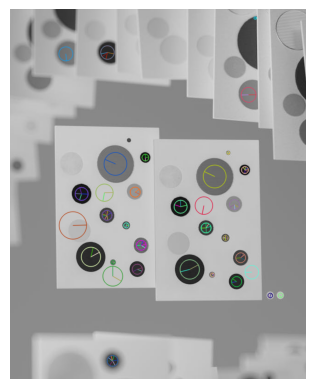

In [107]:
#reinitialize the SIFT detector with different parameters to see their effect
#sift = cv2.SIFT_create(contrastThreshold=0.08, edgeThreshold=3)
sift = cv2.SIFT_create(contrastThreshold=0.09, edgeThreshold=2, nOctaveLayers=5)


#get keypoints again 
keypoints = sift.detect(image1, None)

output_image = cv2.drawKeypoints(image1, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

print(f"Number of keypoints detected in image 1: {len(keypoints)}")

plt.imshow(output_image, cmap='gray')
plt.axis('off')
plt.show()

